## Data Exploration

##### Loading Important Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind



In [36]:
data = pd.read_csv("events_log.csv")
data.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400165 entries, 0 to 400164
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uuid             400165 non-null  object 
 1   timestamp        400165 non-null  float64
 2   session_id       400165 non-null  object 
 3   group            400165 non-null  object 
 4   action           400165 non-null  object 
 5   checkin          223824 non-null  float64
 6   page_id          400165 non-null  object 
 7   n_results        136234 non-null  float64
 8   result_position  230482 non-null  float64
dtypes: float64(4), object(5)
memory usage: 27.5+ MB


In [38]:
data.shape

(400165, 9)

In [39]:
data.isnull().sum() # checking for number of missing values

uuid                    0
timestamp               0
session_id              0
group                   0
action                  0
checkin            176341
page_id                 0
n_results          263931
result_position    169683
dtype: int64

In [40]:
data.select_dtypes(include=['object']).nunique() # checking for distinct values in each column

uuid          400165
session_id     68028
group              2
action             3
page_id       176371
dtype: int64

In [41]:
cnt_action = data['action'].value_counts()
cnt_action

action
checkin             223824
searchResultPage    136234
visitPage            40107
Name: count, dtype: int64

## Data Transformation

##### Converting Date to Timestamp

In [42]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y%m%d%H%M%S')

## Analysis

##### 1. What is the daily overall clickthrough rate? How does it vary between the groups?

###### Steps:
###### - Ca

In [43]:
def overall_clickthrough_rate(data):
    search_events = data[data['action'] == 'searchResultPage'].groupby(data['timestamp'].dt.date).size()
    click_events = data[data['action'] == 'visitPage'].groupby(data['timestamp'].dt.date).size()
    overall_ctr = click_events / search_events
    return overall_ctr

daily_overall_ctr = overall_clickthrough_rate(data)
#print("Daily overall clickthrough rate:")
print(daily_overall_ctr)

timestamp
2016-03-01    0.362142
2016-03-02    0.354037
2016-03-03    0.343129
2016-03-04    0.257511
2016-03-05    0.251666
2016-03-06    0.257186
2016-03-07    0.247962
2016-03-08    0.251457
dtype: float64


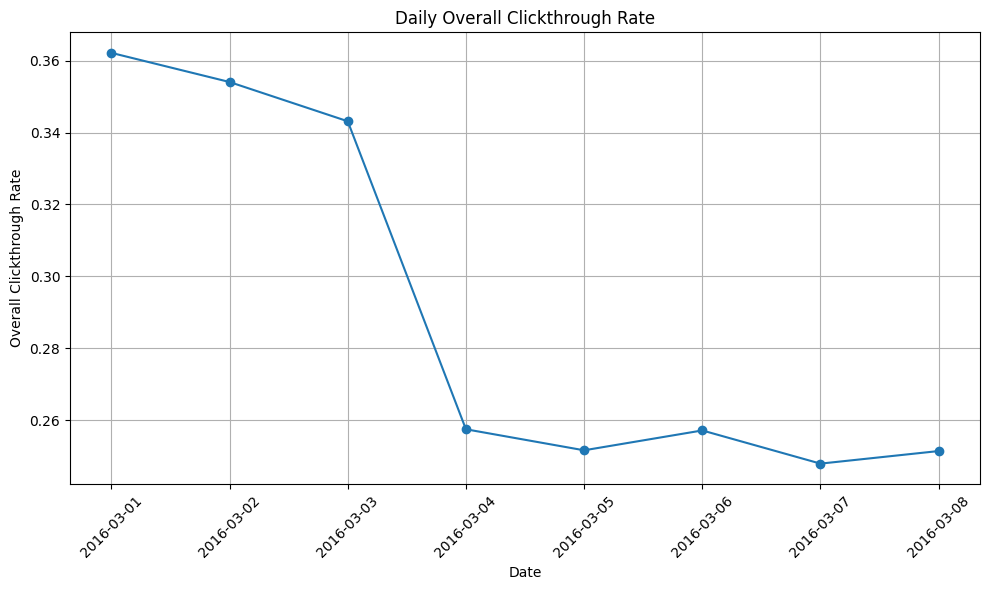

In [44]:
# Plotting the result of the Analysis above

plt.figure(figsize=(10, 6))
plt.plot(daily_overall_ctr.index, daily_overall_ctr.values, marker='o',linestyle='-')
plt.title('Daily Overall Clickthrough Rate')
plt.xlabel('Date')
plt.ylabel('Overall Clickthrough Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1b. How the CTR varies between the different Groups

In [45]:
def clickthrough_rate(data):

    search_events = data[data['action'] == 'searchResultPage'].groupby([data['timestamp'].dt.date, 'group']).size()
    click_events = data[data['action'] == 'visitPage'].groupby([data['timestamp'].dt.date, 'group']).size()
    ctr = click_events / search_events
    return ctr
daily_ctr_grp = clickthrough_rate(data)
print("Daily Clickthrough rate by Group:")
print(daily_ctr_grp)

Daily Clickthrough rate by Group:
timestamp   group
2016-03-01  a        0.470911
            b        0.125863
2016-03-02  a        0.449088
            b        0.133497
2016-03-03  a        0.434864
            b        0.135907
2016-03-04  a        0.299257
            b        0.169797
2016-03-05  a        0.291802
            b        0.176394
2016-03-06  a        0.306368
            b        0.166634
2016-03-07  a        0.284274
            b        0.174905
2016-03-08  a        0.295957
            b        0.161410
dtype: float64


In [46]:
# Variation between groups
ctr_grpA = daily_ctr_grp[:, 'a'].values
ctr_grpB = daily_ctr_grp[:, 'b'].values

ctr_grpA_mean = np.mean(ctr_grpA)
ctr_grpB_mean = np.mean(ctr_grpB)
print("Mean ctr_grpA:", ctr_grpA_mean)
print("Mean ctr_grpB:", ctr_grpB_mean)

Mean ctr_grpA: 0.35406511177507044
Mean ctr_grpB: 0.15555102986441977


In [47]:
if ctr_grpA_mean > ctr_grpB_mean:
    print("Answer: Group A has a higher clickthrough rate.")
elif ctr_grpB_mean > ctr_grpA_mean:
    print("Answer: Group B has a higher clickthrough rate.")
else:
    print("Answer: Both groups have the same clickthrough rate.")

Answer: Group A has a higher clickthrough rate.


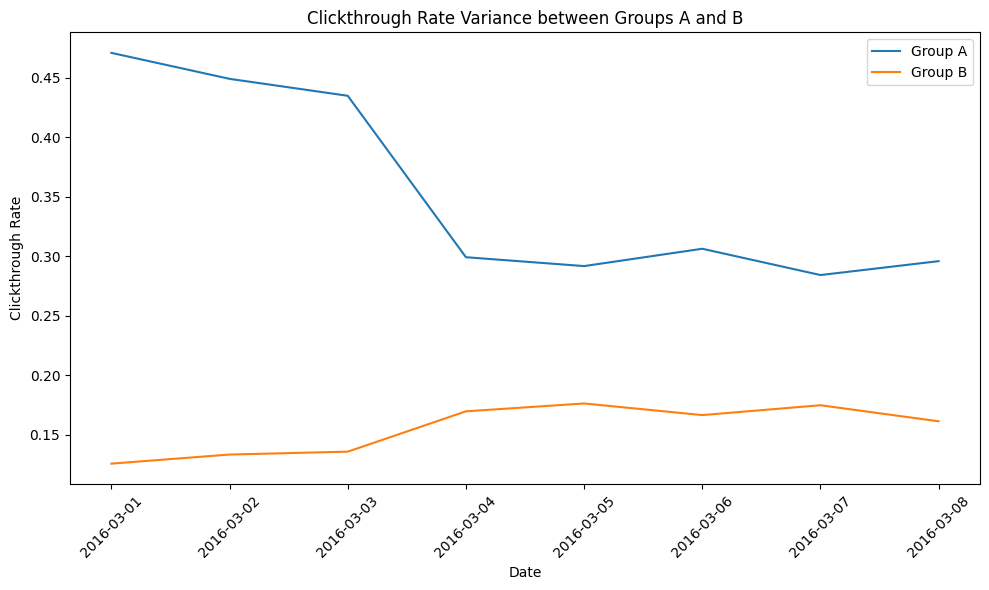

In [48]:
#Plotting clickthrough rate variance between groups A and B

plt.figure(figsize=(10, 6))
plt.plot(daily_ctr_grp.index.levels[0], ctr_grpA, label='Group A')
plt.plot(daily_ctr_grp.index.levels[0], ctr_grpB, label='Group B')
plt.title('Clickthrough Rate Variance between Groups A and B')
plt.xlabel('Date')
plt.ylabel('Clickthrough Rate')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#ax.set_facecolor('darkgrey') 
plt.show()

##### 2. Which results do people tend to try first?

In [49]:
def first_click_results(data):
    first_clicks = data[data['action'] == 'visitPage']['result_position'].value_counts().sort_index()
    return first_clicks.head()
first_clicks_distribution = first_click_results(data)
print("Results people try first:")
print(first_clicks_distribution)


Results people try first:
result_position
1.0    21263
2.0     4858
3.0     2482
4.0     1358
5.0      847
Name: count, dtype: int64


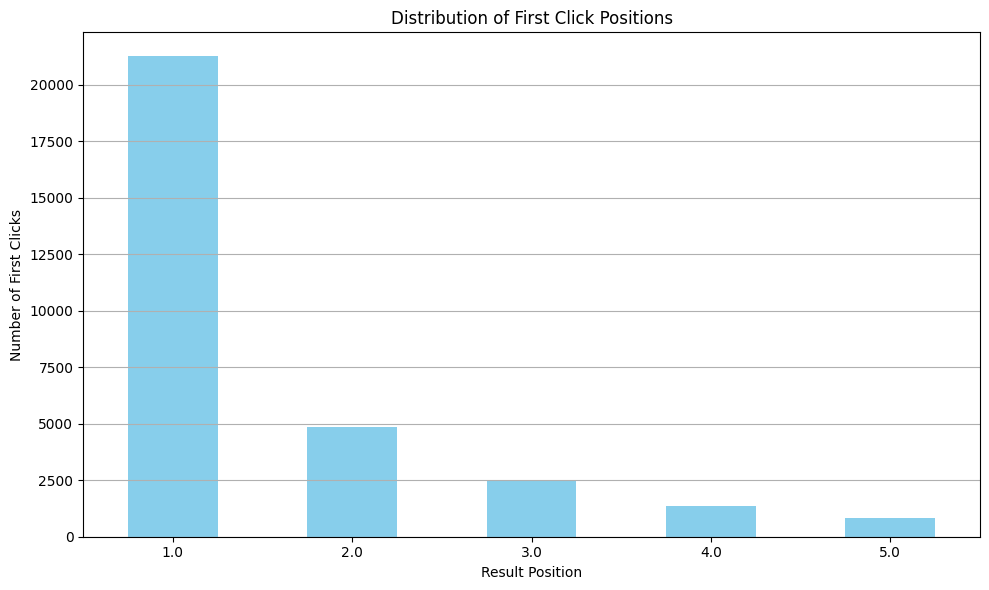

In [50]:
# Visualize the distribution of first-click positions

plt.figure(figsize=(10, 6))
first_clicks_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of First Click Positions')
plt.xlabel('Result Position')
plt.ylabel('Number of First Clicks')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### 2b. How does it change day-to-day? 

In [51]:
def Top_3_click_results_per_day(data):
    Top_3_clicks_per_day = data[data['action'] == 'visitPage'].groupby([data['timestamp'].dt.date, 'result_position']).result_position.value_counts().unstack(fill_value=0)
    return Top_3_clicks_per_day.iloc[:, :3]
Top_3_clicks_distribution_per_day = Top_3_click_results_per_day(data)
print("Top 3 Results people try daily):")
print(Top_3_clicks_distribution_per_day)

Top 3 Results people try daily):
result_position   1.0  2.0  3.0
timestamp                      
2016-03-01       2825  675  302
2016-03-02       2854  639  359
2016-03-03       3002  673  360
2016-03-04       2692  604  288
2016-03-05       2055  510  241
2016-03-06       2350  545  284
2016-03-07       2962  647  356
2016-03-08       2523  565  292


<Figure size 1000x600 with 0 Axes>

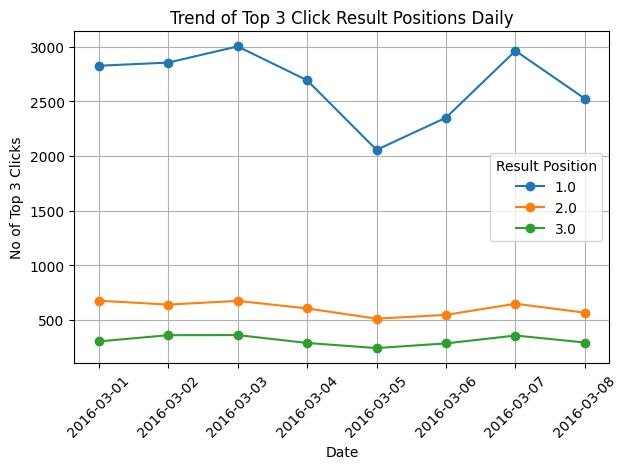

In [52]:
# Visualizing the change in Top 3 Click distribution per day

plt.figure(figsize=(10, 6))
Top_3_clicks_distribution_per_day.plot(marker='o', linestyle='-')
plt.title('Trend of Top 3 Click Result Positions Daily')
plt.xlabel('Date')
plt.ylabel('No of Top 3 Clicks')
plt.legend(title='Result Position')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 3. What is the daily overall zero results rate?

In [64]:
def overall_ZRR(data):
    search_events = data[data['action'] == 'searchResultPage'].groupby(data['timestamp'].dt.date).size()
    zero_results_events = data[data['n_results'] == 0].groupby(data['timestamp'].dt.date).size()
    overall_ZRR = zero_results_events / search_events
    return overall_ZRR

daily_overall_ZRR = overall_ZRR(data)
print("Daily overall ZRR:")
print(daily_overall_ZRR)

Daily overall ZRR:
timestamp
2016-03-01    0.187602
2016-03-02    0.189874
2016-03-03    0.179707
2016-03-04    0.180810
2016-03-05    0.184944
2016-03-06    0.176157
2016-03-07    0.182000
2016-03-08    0.193717
dtype: float64


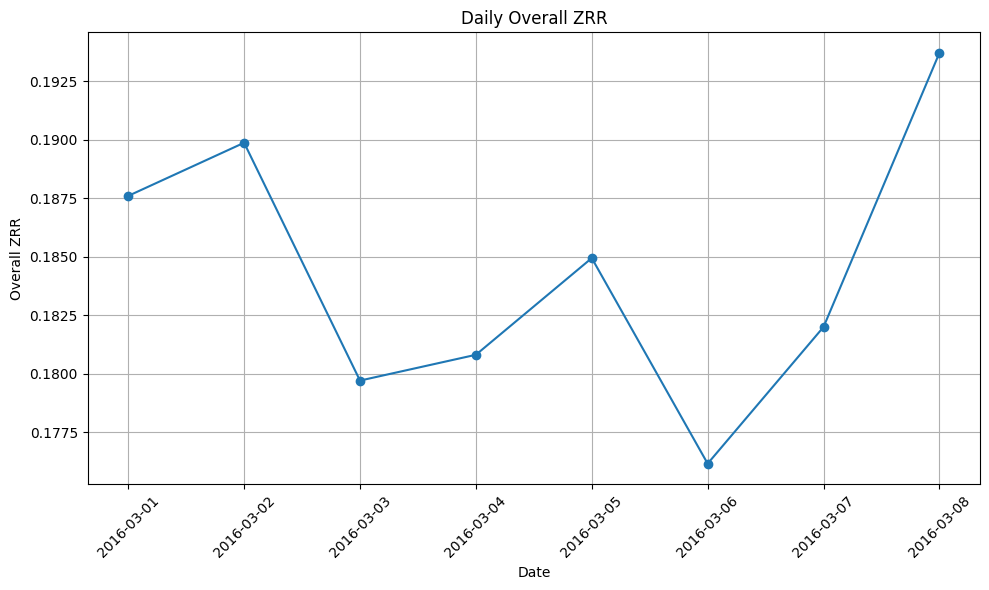

In [66]:
# Plotting the result of the Analysis above

plt.figure(figsize=(10, 6))
plt.plot(daily_overall_ZRR.index, daily_overall_ZRR.values, marker='o',linestyle='-')
plt.title('Daily Overall ZRR')
plt.xlabel('Date')
plt.ylabel('Overall ZRR')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 3b. How does it vary between the groups?

In [67]:
def ZR_Rate(data):

    search_events = data[data['action'] == 'searchResultPage'].groupby([data['timestamp'].dt.date, 'group']).size()
    zero_results_events = data[data['n_results'] == 0].groupby([data['timestamp'].dt.date,'group']).size()
    ctr = zero_results_events / search_events
    return ctr
daily_zr_grp = ZR_Rate(data)
print("Daily ZR rate by Group:")
print(daily_zr_grp)

Daily ZR rate by Group:
timestamp   group
2016-03-01  a        0.186775
            b        0.189399
2016-03-02  a        0.191082
            b        0.187072
2016-03-03  a        0.178539
            b        0.182344
2016-03-04  a        0.183041
            b        0.176121
2016-03-05  a        0.178240
            b        0.197517
2016-03-06  a        0.168867
            b        0.189578
2016-03-07  a        0.182377
            b        0.181242
2016-03-08  a        0.196113
            b        0.188868
dtype: float64


In [60]:
# Variation between groups
zrr_grpA = daily_zr_grp[:, 'a'].values
zrr_grpB = daily_zr_grp[:, 'b'].values

zrr_grpA_mean = np.mean(zrr_grpA)
zrr_grpB_mean = np.mean(zrr_grpB)
print("Mean ctr_grpA:", zrr_grpA_mean)
print("Mean ctr_grpB:", zrr_grpB_mean)

Mean ctr_grpA: 0.18312908076338574
Mean ctr_grpB: 0.1865176631583894


In [61]:
if zrr_grpA_mean > zrr_grpB_mean:
    print("Answer: Group A has a higher ZRR.")
elif zrr_grpB_mean > zrr_grpA_mean:
    print("Answer: Group B has a higher ZRR.")
else:
    print("Answer: Both groups have same ZRR.")

Answer: Group B has a higher ZRR.


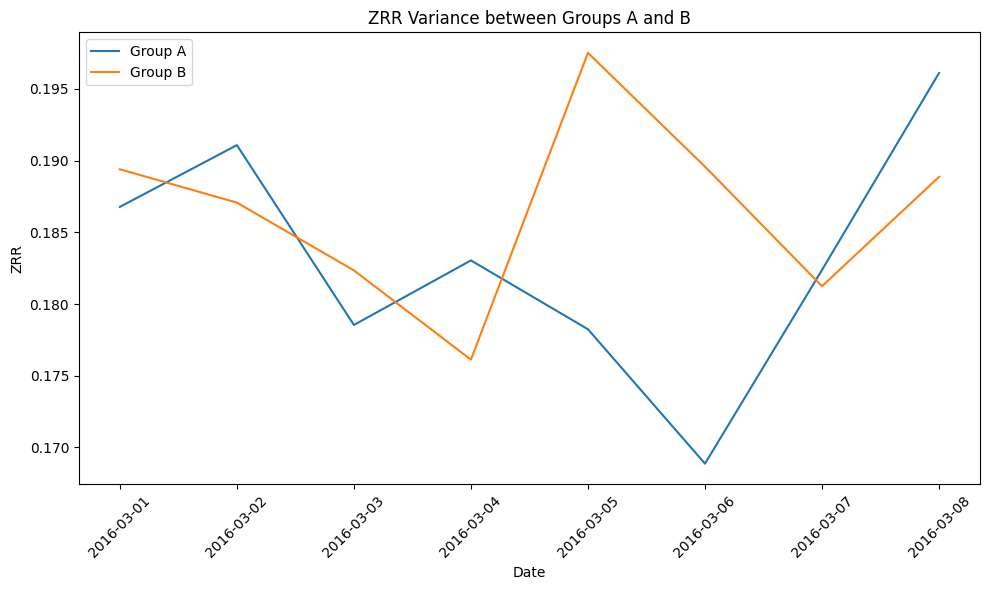

In [62]:
#Plotting ZRR variance between groups A and B

plt.figure(figsize=(10, 6))
plt.plot(daily_zr_grp.index.levels[0], zrr_grpA, label='Group A')
plt.plot(daily_zr_grp.index.levels[0], zrr_grpB, label='Group B')
plt.title('ZRR Variance between Groups A and B')
plt.xlabel('Date')
plt.ylabel('ZRR')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#ax.set_facecolor('darkgrey') 
plt.show()

##### 3b. Is there a statistically significant difference?

In [72]:
zrr_grpA = daily_zr_grp[:, 'a'].values
zrr_grpB = daily_zr_grp[:, 'b'].values

t_stat, p_value = ttest_ind(zrr_grpA,zrr_grpB)
print("Statistical significance (p-value) between groups:")
print("p-value =", round(p_value,2))

if p_value < 0.05:
    print("There is a statistically significant difference between the ZRR of groups 'a' and 'b'.")
else:
    print("There is no statistically significant difference between the ZRR of groups 'a' and 'b'.")

Statistical significance (p-value) between groups:
p-value = 0.38
There is no statistically significant difference between the ZRR of groups 'a' and 'b'.


##### 4. Let session length be approximately the time between the first event and the last event in a session. Choose a variable from the dataset and describe its relationshipto session length by group. Can you identify any strong correlations?


In [71]:
# Relationship between the chekin variable and the session length variable.

session_length = data.groupby(['session_id', 'group'])['timestamp'].agg(lambda x: (x.max() - x.min()).seconds)
variable_session_corr = data.groupby(['session_id', 'group'])['checkin'].mean().corr(session_length)
print("\nCorrelation between 'checkin' and session length by group:",round(variable_session_corr,2))


Correlation between 'checkin' and session length by group: 0.13


##### 4b. Visualize the relationship

In [73]:
session_length = data.groupby(['session_id', 'group'])['timestamp'].agg(lambda x: (x.max() - x.min()).seconds)
checkin_mean = data.groupby(['session_id', 'group'])['checkin'].mean()

session_checkin_df = pd.DataFrame({'session_length': session_length,'checkin_mean': checkin_mean})  # Creating a DF that would store the session length and checkin Mean

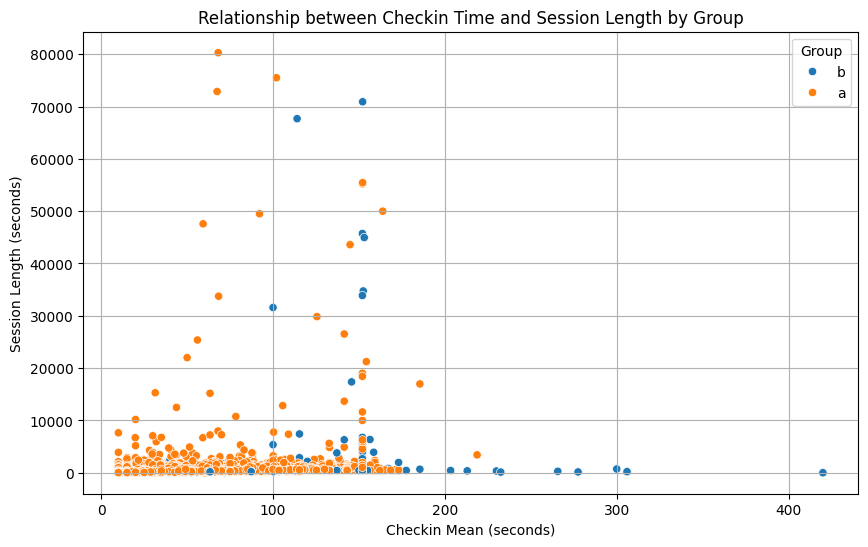

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='checkin_mean', y='session_length', hue='group',data=session_checkin_df)
plt.title('Relationship between Checkin Time and Session Length by Group')
plt.xlabel('Checkin Mean (seconds)')
plt.ylabel('Session Length (seconds)')
plt.legend(title='Group')
plt.grid(True)
plt.show()